#  Importing Necessary Libraries for Dataset

In [1]:
!pip install textblob

In [2]:
!pip install wordcloud

In [3]:
!pip install spacy

In [4]:
import numpy as np    # Linear Algebra
import pandas as pd    #Data Processing
import matplotlib.pyplot as plt
import seaborn as sns
import string         #Special operations on strings
import spacy         #Language models

from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
#Reading the Dataset

df=pd.read_csv("Elon_musk.csv",encoding="Latin-1")

In [6]:
df

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [7]:
# Info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [8]:
# Checking the null values

df.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, Text]
Index: []

In [10]:
#Shape of the dataset

df.shape

(1999, 2)

In [11]:
# Dropping the 'un-named' column

df.drop(['Unnamed: 0'],inplace=True,axis=1)
df

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

#  Text Pre-Processing

In [12]:
df=[Text.strip() for Text in df.Text]
df=[Text for Text in df if Text]
df[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [13]:
text=" ".join(df)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [14]:
len(text)

158702

In [15]:
df_text=" ".join(df)
df_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [16]:
tokenizer=TweetTokenizer(strip_handles=True)
tweets_tokens=tokenizer.tokenize(df_text)
print(df_text)

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [17]:
df_tokens_text=" ".join(tweets_tokens)
df_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [18]:
no_punc_text=df_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [19]:
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [20]:
# Importing Natural language tool kit (nltk)

import nltk
nltk.download("punkt")
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saikr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
len(text_tokens)

17847

In [22]:
!pip install nltk

In [23]:
import nltk

nltk.download('stopwords')

my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saikr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missing', 'back', 'work', 'go', 'does', 'seem', 'bit', 'high', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', 'wow', '1', 'orbital', 'launch', 'tower', 'stack', '2', 'enough', 'raptors', 'orbit', 'booster']


In [25]:
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow', '1', 'orbit', 'launch', 'tower', 'stack', '2', 'enough', 'raptor', 'orbit', 'booster']


In [26]:
!python -m spacy download en


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 525.1 kB/s eta 0:00:25
      -------------------------------------- 0.2/12.8 MB 807.1 kB/s eta 0:00:16
      --------------------------------------- 0.3/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 3.1 MB/s eta 0:00:04
     ---- ----------------------------------- 1.6/12.8 MB 3.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.9/12.8 MB 3.8 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 3.8 

In [27]:
import spacy

In [28]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In [29]:
tokenizer=TweetTokenizer(strip_handles=True)
tweets_tokens=tokenizer.tokenize(df_text)
print(df_text)

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [30]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'st

In [31]:
clean_tweets=" ".join(lemmas)
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mar xprize team manage 100 m

In [32]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)

{'alien': 194, 'ray': 2346, 'trace': 3011, 'cyberpunk': 767, 'hdr': 1357, 'nextlevel': 1959, 'have': 1352, 'try': 3042, 'great': 1304, 'interview': 1555, 'doge': 890, 'underestimate': 3175, 'congratulation': 675, 'tesla': 2916, 'china': 584, 'amazing': 217, 'execution': 1057, 'last': 1639, 'year': 3391, 'now': 1987, 'next': 1958, 'even': 1031, 'happy': 1339, 'new': 1956, 'ox': 2088, 'frodo': 1207, 'underdoge': 3174, 'all': 197, 'thought': 2953, 'would': 3377, 'fail': 1091, 'himself': 1401, 'haha': 1327, 'thank': 2927, 'indeed': 1496, 'tweet': 3057, 'definitely': 804, 'represent': 2413, 'realworld': 2361, 'time': 2969, 'allocation': 199, 'the': 2932, 'entertaining': 1001, 'outcome': 2067, 'likely': 1694, 'just': 1597, 'send': 2556, 'agree': 179, 'clubhouse': 613, 'it': 1574, 'get': 1266, 'real': 2356, 'buy': 502, 'dogecoin': 892, 'lil': 1695, 'toddler': 2981, 'hodler': 1407, 'he': 1358, 'issue': 1573, 'sentencing': 2561, 'seem': 2548, 'bit': 418, 'high': 1392, 'fix': 1152, 'please': 218

In [33]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
print(tweetscv.toarray().shape)

(11486, 3411)


In [35]:
cv_ngram_range=CountVectorizer(analyzer="word",ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [36]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['actually' 'ai' 'also' 'back' 'big' 'booster' 'car' 'come' 'cool' 'could'
 'crew' 'day' 'design' 'do' 'dragon' 'earth' 'engine' 'even' 'ever'
 'exactly' 'falcon' 'first' 'flight' 'fsd' 'future' 'get' 'go' 'good'
 'great' 'haha' 'hard' 'high' 'if' 'it' 'just' 'land' 'launch' 'life'
 'like' 'look' 'lot' 'love' 'make' 'many' 'mar' 'maybe' 'mission' 'model'
 'much' 'need' 'new' 'next' 'no' 'not' 'one' 'part' 'people' 'point'
 'pretty' 'probably' 'production' 'right' 'rocket' 'rt' 'say' 'seem'
 'soon' 'space' 'spacex' 'starlink' 'starship' 'start' 'still' 'super'
 'sure' 'take' 'tesla' 'test' 'thank' 'that' 'the' 'there' 'they' 'think'
 'this' 'time' 'true' 'try' 'ufe0f' 'use' 'way' 'we' 'week' 'well' 'will'
 'work' 'would' 'yeah' 'year' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#  Generating the Word Cloud

In [40]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

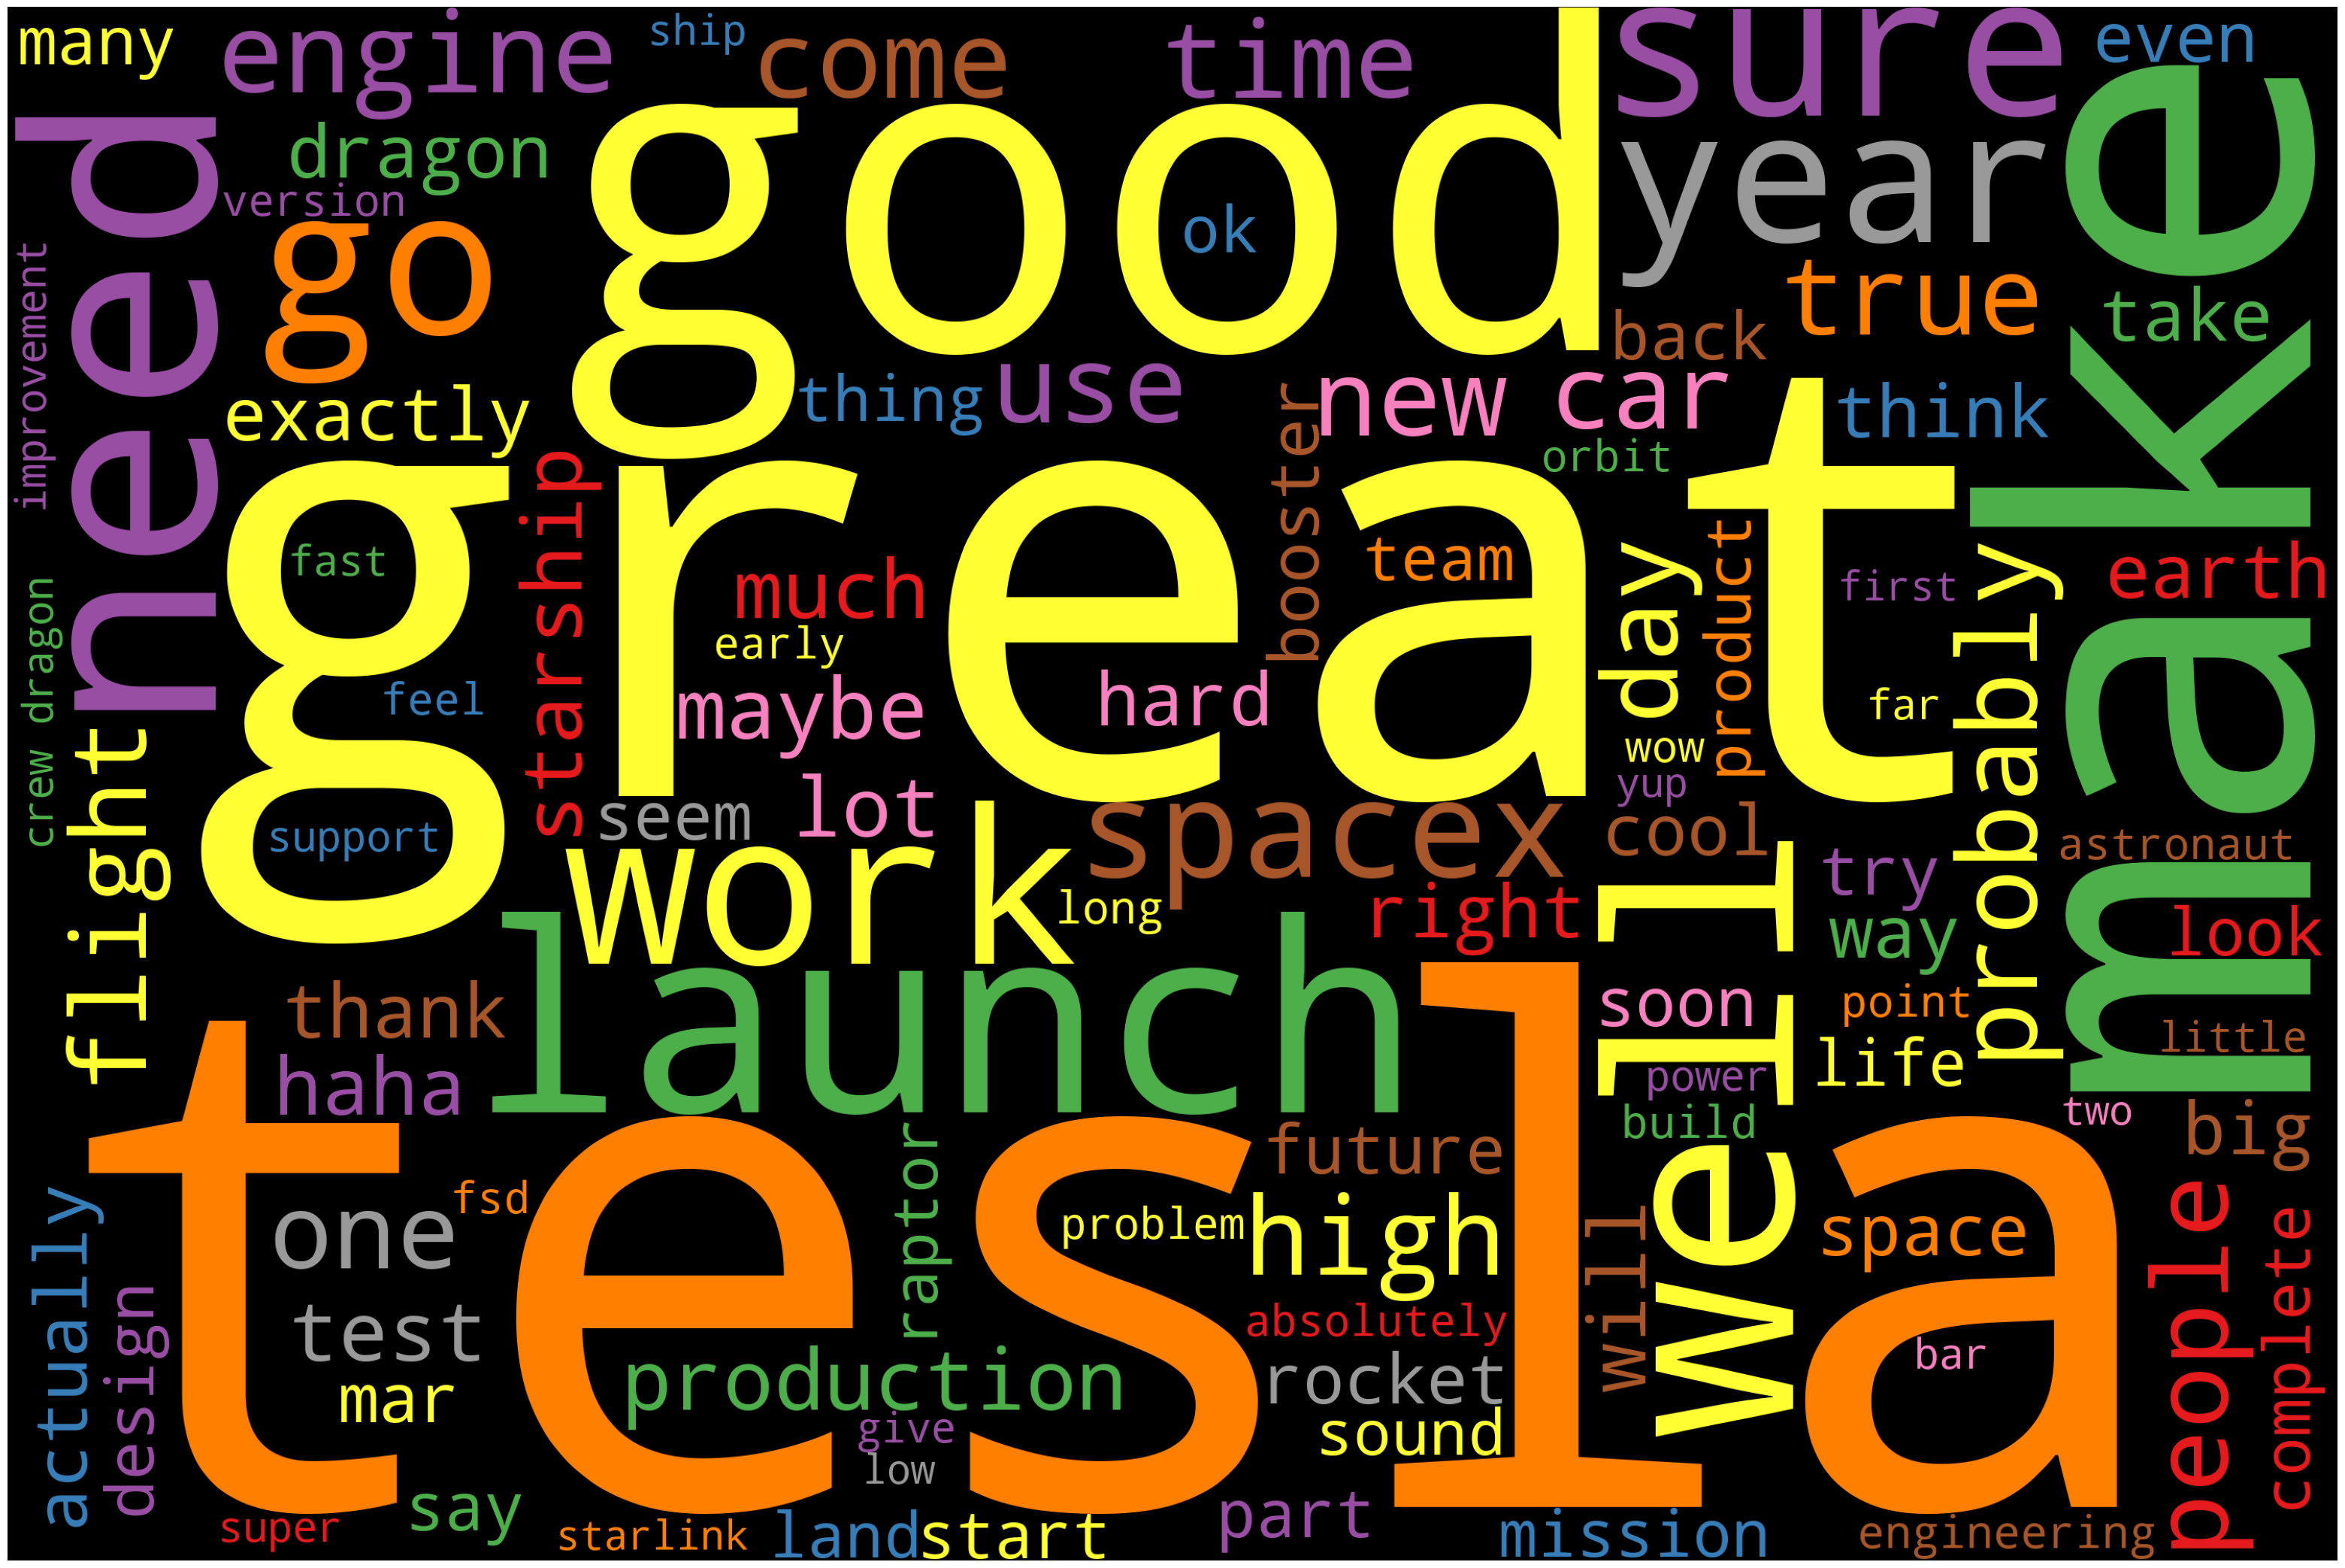

In [43]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='Black', max_words=100,colormap='Set1',stopwords=stopwords).generate(clean_tweets)

plot_cloud(wordcloud)


#  Name Entity Recognization

In [45]:
!pip install spacy

In [48]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [49]:
for token in doc_block[100:200]:
    print(token,token.pos_)

once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex VERB
need AUX
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADP
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit NOUN
high ADJ
doge PROPN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin PROPN
per ADP
unit NOUN
time NOUN
whereas SCONJ
wow INTJ
1 NUM
orb

In [51]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
print(nouns_verbs)

['trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'interview', 'congratulation', 'tesla', 'execution', 'year', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'fail', 'thank', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'send', 'agree', 'clubhouse', 'get', 'buy', 'dogecoin', 'lil', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'bit', 'thank', 'fix', 'unlock', 'account', 'power', 'wallet', 'give', 'avoid', 'cost', 'app', 'suck', 'launch', 'element', 'gateway', 'mission', 'predict', 'cash', 'flow', 'starlink', 'starlink', 'endeavor', 'spacex', 'pass', 'cash', 'flow', 'year', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'mean', 'price', 'country', 'difference', 'taxis', 'ship', 'intend', 'earth', 'idea', 'apply', 'team', 'manage', 'carbon', 'capture', 'prize', 'tesla', 'receive', 'stock', 'comp', 'stock', 'option', 'take', 'table', 'miss', 'work', 'go', 'seem', 'bit', 'appear', 'fix', 'unit', 'time', 'launch', 'tower', 'stack', 'raptor'

In [56]:
cv=CountVectorizer()
x=cv.fit_transform(nouns_verbs)
sum_words=x.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=["word","count"]

In [57]:
wd_df[0:10]

word  count
0   tesla     76
1    make     64
2  launch     62
3    year     49
4    work     49
5    need     48
6      go     43
7    come     42
8     get     38
9     day     38

In [58]:
wd_df[0:10].plot.bar(x="word",figsize=(15,7),title="Top 10 nouns and verbs",color="Brown")

<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

#  Emotional Mining Analysis

In [59]:
from nltk import tokenize

In [60]:
sentences=tokenize.sent_tokenize(" ".join(df))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [63]:
sent_df=pd.DataFrame(sentences,columns=["sentences"])
sent_df

sentences
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
922  @kenyanwalstreet Not actually a payout, just a...
923  It may never pay out, as the stock cant b
 ht...
924                                    Details Aug 28.
925  AI symbiosis while u wait @vistacruiser7 @flcn...
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[927 rows x 1 columns]

In [65]:
# Reading the Affin data

affin=pd.read_csv("Afinn.csv",sep=",",encoding="Latin-1")

In [66]:
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [68]:
affinity_scores=affin.set_index("word")["value"].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [70]:
nlp=spacy.load("en_core_web_sm")
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
        return sent_score

In [71]:
calculate_sentiment(text="great")

3

In [73]:
sent_df["sentiment_value"]=sent_df["sentences"].apply(calculate_sentiment)
sent_df["sentiment_value"]

0      0
1      0
2      3
3      3
4      0
      ..
922    0
923   -4
924    0
925   -2
926    0
Name: sentiment_value, Length: 927, dtype: int64

In [76]:
sent_df["word_count"]=sent_df["sentences"].str.split().apply(len)
sent_df["word_count"]

0      13
1       4
2       4
3      13
4       8
       ..
922    11
923    31
924     3
925    47
926    15
Name: word_count, Length: 927, dtype: int64

In [77]:
sent_df.sort_values(by="sentiment_value")

sentences  sentiment_value  \
840  Cool Model 3 review by @iamjamiefoxx https://t...               -8   
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
923  It may never pay out, as the stock cant b
 ht...               -4   
683  Occasional flights from land are ok, but frequ...               -4   
..                                                 ...              ...   
648  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
588  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
722  We just havent observed the
 https://t.co/mez...               17   

     word_count  
840          61  
650          60  
64           11  
923          31  
683          39  
..          ...  
648          65  
588         138  
105          94  
36          231  
722          72  

[927 rows x 3 columns]

In [78]:
sent_df[sent_df["sentiment_value"]<=0]

sentences  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...               -4   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
4             8  
5             6  
6            14  
..          ...  
922          11  
923          31  
924           3  
925          47  
926          15  

[492 rows x 3 columns]

In [79]:
sent_df[sent_df["sentiment_value"]>=0]

sentences  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
920               This is both great &amp; terrifying.                3   
921  Everything weve ever sensed or thought has be...                2   
922  @kenyanwalstreet Not actually a payout, just a...                0   
924                                    Details Aug 28.                0   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
2             4  
3            13  
4             8  
..          ...  
920           6  
921          17  
922          11  
924           3  
926          15  

[817 rows x 3 columns]

In [80]:
sent_df["index"]=range(0,len(sent_df))
sent_df

sentences  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...               -4   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
922          11    922  
923          31    923  
924           3    924  
925          47    925  
926          15    926  

[927 rows x 4 columns]

C:\Users\saikr\AppData\Local\Temp\ipykernel_16276\3213527928.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df["sentiment_value"],color="purple")


<Axes: xlabel='sentiment_value', ylabel='Density'>

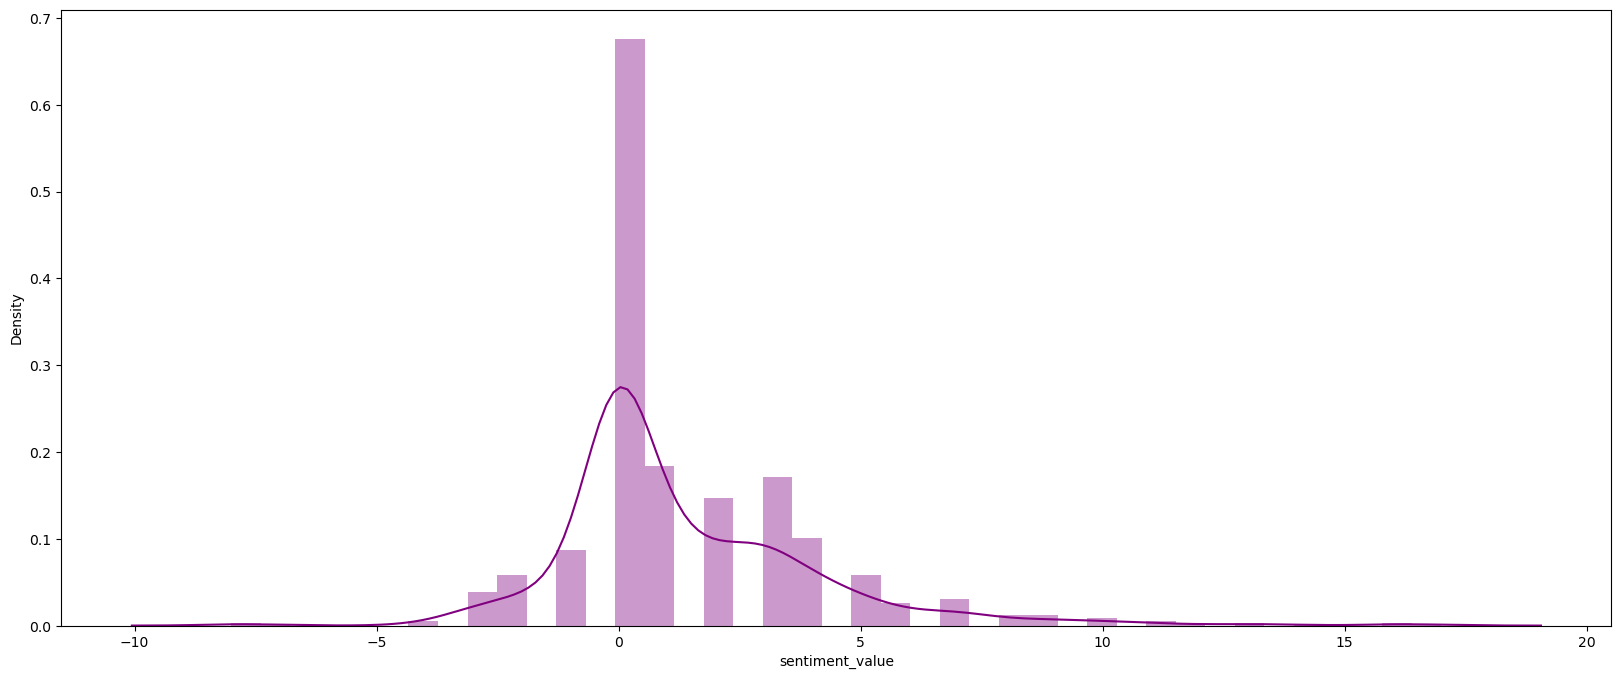

In [81]:
plt.figure(figsize=(20,8))
sns.distplot(sent_df["sentiment_value"],color="purple")

In [82]:
#Sentiment analysis


sent_df.plot.scatter(x="word_count",y="sentiment_value",title="Sentence sentiment value to sentence word count",figsize=(20,8),color="brown")

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

<Axes: ylabel='Density'>

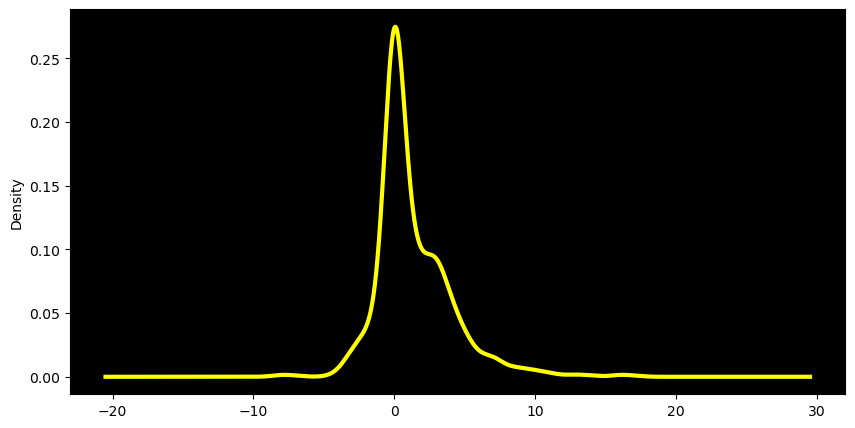

In [86]:
# Density Plot

ax=plt.axes()
ax.set_facecolor("black")
sent_df["sentiment_value"].plot(kind="kde",figsize=(10,5),color="yellow",linewidth=3)


<Axes: ylabel='Density'>

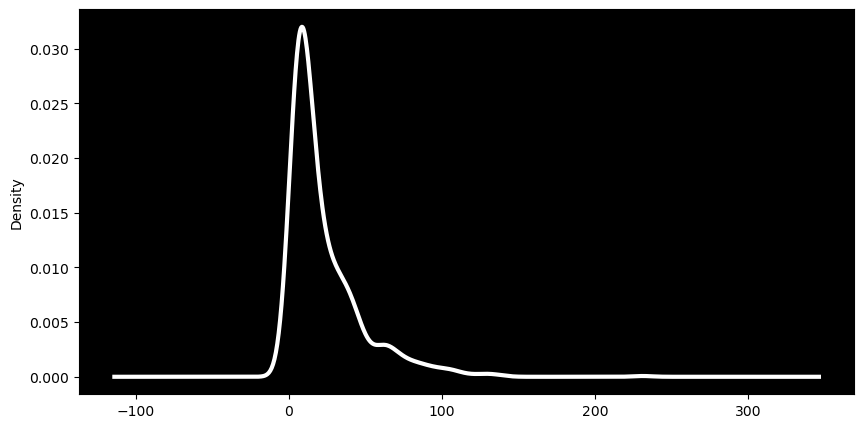

In [85]:
ax=plt.axes()
ax.set_facecolor("black")
sent_df["word_count"].plot(kind="kde",figsize=(10,5),color="white",linewidth=3)

<Axes: xlabel='index', ylabel='sentiment_value'>

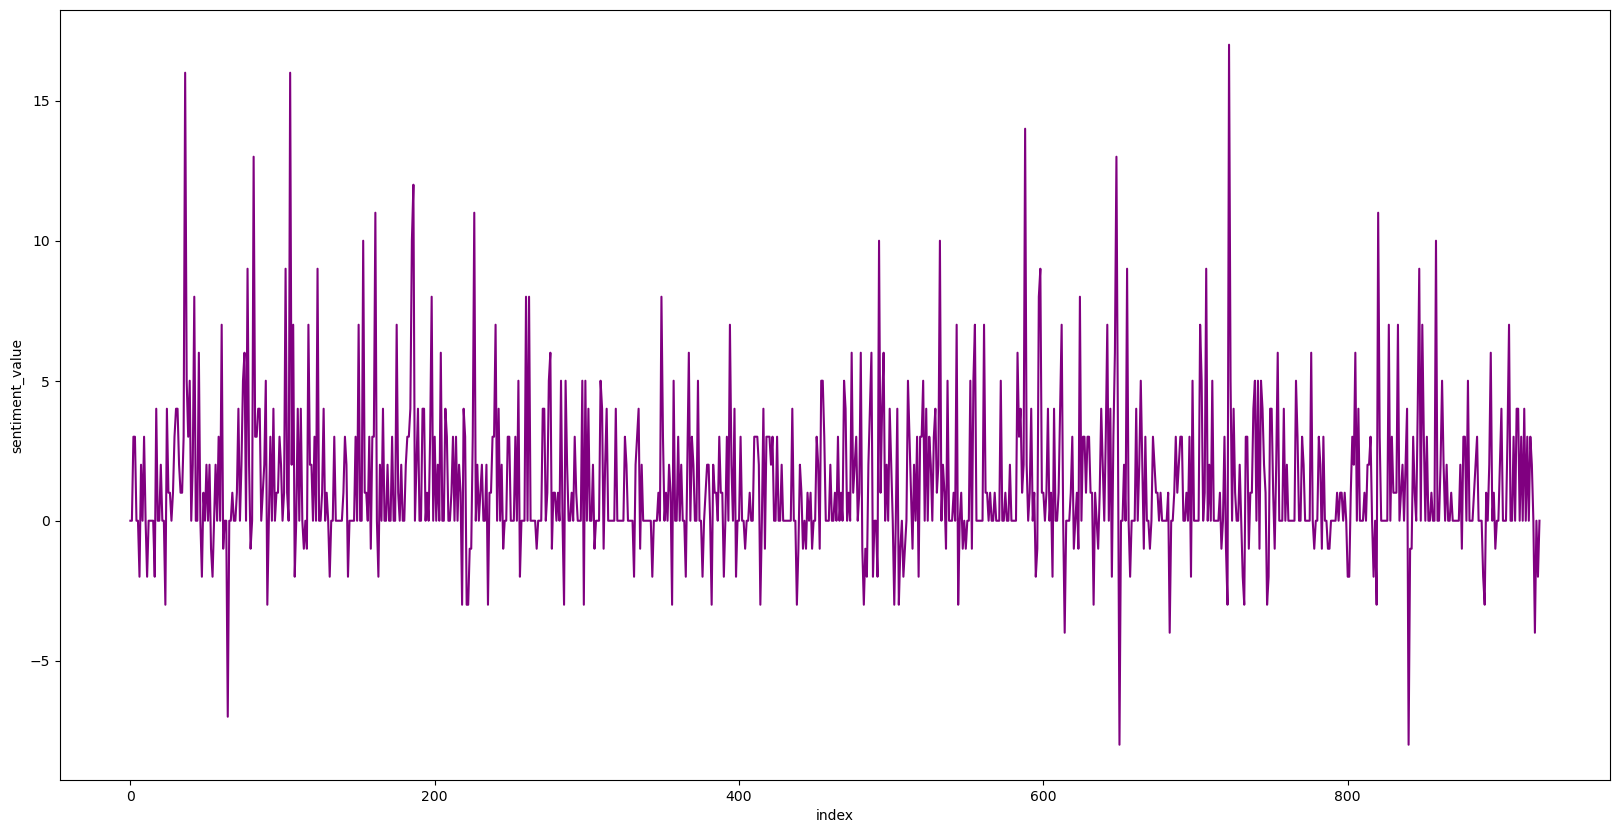

In [87]:
# Plotting the lineplot for sentimental value of whole review

plt.figure(figsize=(20,10))
sns.lineplot(y="sentiment_value",x="index",data=sent_df,color="purple")

In [90]:
sent_df["Sentiment_Class"]=pd.cut(x=sent_df["sentiment_value"],bins=[-8,-1,0,17],
                                   labels=["Negative","Neutral","Positive"],right=True)

In [91]:
sns.countplot(x="Sentiment_Class",data=sent_df)

<Axes: xlabel='Sentiment_Class', ylabel='count'>

In [92]:
sent_df["Sentiment_Class"].value_counts()

Positive    435
Neutral     382
Negative    108
Name: Sentiment_Class, dtype: int64